In [1]:
import pandas as pd
import numpy as np

Ucitavanje baze, podela na trening, test i validacioni skup, skaliranje i primena PCA algoritma.

In [2]:
pd.set_option('display.max_columns', 600)

In [3]:
database = pd.read_csv('celaBazaPosleEpiMut.csv', sep=',', header=0)

In [4]:
database

Gene name variation  alpha-CH chemical shifts (Andersen et al., 1992) 1  \
0          MTOR    M1083V                                          14.742968    
1          MTOR    A1134V                                          -6.753854    
2          AKT1     V167A                                           4.318244    
3        MAP2K1     A366G                                          -8.043543    
4        MAP2K1     G392S                                          -9.852562    
...         ...       ...                                                ...    
95894     NT5C2     R195Q                                          -0.248485    
95895     NT5C2     G355E                                           9.329554    
95896     NT5C2      M53R                                           3.432416    
95897     NT5C2     G273W                                          -8.458504    
95898     NT5C2     S251R                                           2.116767    

       Hydrophobicity index (Argos et al., 1982) 1  \
0                                       -33.311483   
1                                       -54.468830   
2                                        27.903090   
3                                         9.511877   
4                                         1.481990   
...                                            ...   
95894                                   -45.966315   
95895                                   -32.979865   
95896                                    16.042263   
95897                                   194.497802   
95898                                   -45.342221   

       Signal sequence helical potential (Argos et al., 1982) 1  \
0                                             591.554818          
1                                             -23.158126          
2                                              -5.784182          
3                                              65.541026          
4                                              24.888312          
...                                                  ...          
95894                                          54.832550          
95895                                          44.546857          
95896                                          75.554689          
95897                                          30.518072          
95898                                          89.195976          

       Membrane-buried preference parameters (Argos et al., 1982) 1  \
0                                             605.156577              
1                                             -92.762155              
2                                             -20.847024              
3                                              83.522085              
4                                               8.298248              
...                                                  ...              
95894                                          -4.802087              
95895                                          -3.918395              
95896                                         169.641178              
95897                                         -38.450264              
95898                                          32.758690              

       Conformational parameter of inner helix (Beghin-Dirkx, 1975) 1  \
0                                               5.875901                
1                                               9.222564                
2                                               5.140362                
3                                              -6.650271                
4                                               0.000000                
...                                                  ...                
95894                                          -0.936179                
95895                                           8.448055                
95896                                          -7.590063             

In [5]:
database.describe()

alpha-CH chemical shifts (Andersen et al., 1992) 1  \
count                                       95899.000000    
mean                                            0.698141    
std                                            15.617005    
min                                          -225.515870    
25%                                            -3.979647    
50%                                             0.000000    
75%                                             5.271487    
max                                           233.716377    

       Hydrophobicity index (Argos et al., 1982) 1  \
count                                 95899.000000   
mean                                      7.893816   
std                                     151.795453   
min                                   -1405.775472   
25%                                     -52.398052   
50%                                       0.916813   
75%                                      65.737574   
max                                    1819.713963   

       Signal sequence helical potential (Argos et al., 1982) 1  \
count                                       95899.000000          
mean                                            6.919372          
std                                           180.022927          
min                                         -1507.604710          
25%                                           -44.257530          
50%                                             2.377047          
75%                                            56.295043          
max                                          1406.144672          

       Membrane-buried preference parameters (Argos et al., 1982) 1  \
count                                       95899.000000              
mean                                            5.546603              
std                                           151.454028              
min                                         -1166.625173              
25%                                           -38.164651              
50%                                             1.892493              
75%                                            48.797549              
max                                          1226.635452              

       Conformational parameter of inner helix (Beghin-Dirkx, 1975) 1  \
count                                       95899.000000                
mean                                            1.763952                
std                                            24.452448                
min                                          -219.961016                
25%                                            -6.783583                
50%                                             0.228709                
75%                                             9.409683                
max                                           219.450784                

       Conformational parameter of beta-structure (Beghin-Dirkx, 1975) 1  \
count                                       95899.000000                   
mean                                            0.288530                   
std                                             6.135673                   
min                                           -56.158758                   
25%                                            -1.625076                   
50%                                             0.000000                   
75%                                             2.197984                   
max                                            58.191687                   

       Conformational parameter of beta-turn (Beghin-Dirkx, 1975) 1  \
count                                       95899.000000              
mean                                            0.699405              
std                                            11.303624              
min                                           -92.207657              
25%                         

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
y = database['Class']
X = database.drop(columns=['Class', 'variation', 'Gene name'])

In [6]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=7, stratify=y_train_val)

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=300)

In [11]:
pca.fit(X_train, y_train)

PCA(n_components=300)

In [12]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_val_pca = pca.transform(X_val)

Procenat sacuvanih informacija.

In [13]:
sum(pca.explained_variance_ratio_)

0.9167903978041609

In [13]:
import imblearn

Using TensorFlow backend.


In [15]:
np.bincount(y_train)

array([ 2136, 59239])

In [17]:
np.bincount(y_train_resampled_ensem)

array([ 5923, 59239])

In [14]:
import tensorflow as tf

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
from tensorflow import keras

Formiranje modela. Svi modeli su prvobitno ispitani preko validacionog skupa radi ispitivanja parametara.

Formiranje modela nad nebalansiranim podacima.

In [227]:
output_bias= np.log([len(y_train[y_train==1])/len(y_train[y_train==0])])

In [228]:
output_bias

array([3.32264519])

In [229]:
output_bias = tf.keras.initializers.Constant(output_bias)

In [17]:
metrike = [tf.keras.metrics.TrueNegatives(name='tn'),
           tf.keras.metrics.AUC(name='roc'),
           tf.keras.metrics.AUC(name='prc', curve='PR'),
           tf.keras.metrics.BinaryAccuracy(name='acc')
]

In [20]:
modelNoBalance = Sequential()

In [21]:
modelNoBalance.add(Dense(units=20, input_dim=300, activation='relu'))
modelNoBalance.add(Dense(units=10, activation='relu'))
modelNoBalance.add(Dense(units=1, activation='sigmoid'))

In [18]:
from tensorflow.keras import optimizers
from tensorflow.keras import losses
import tensorflow_addons as tfa

In [22]:
modelNoBalance.compile(optimizers.Adam(learning_rate = 0.0001), loss=tfa.losses.SigmoidFocalCrossEntropy() , metrics=metrike)

In [23]:
history = modelNoBalance.fit(X_train_pca, y_train, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
768/768 [==============================] - 4s 3ms/step - loss: 0.0504 - tn: 398.0000 - roc: 0.5080 - prc: 0.9670 - acc: 0.7470 - val_loss: 0.0364 - val_tn: 38.0000 - val_roc: 0.5321 - val_prc: 0.9666 - val_acc: 0.9073
Epoch 2/30
768/768 [==============================] - 2s 3ms/step - loss: 0.0321 - tn: 63.0000 - roc: 0.5327 - prc: 0.9694 - acc: 0.9323 - val_loss: 0.0323 - val_tn: 11.0000 - val_roc: 0.5333 - val_prc: 0.9669 - val_acc: 0.9431
Epoch 3/30
768/768 [==============================] - 2s 2ms/step - loss: 0.0282 - tn: 37.0000 - roc: 0.5515 - prc: 0.9718 - acc: 0.9518 - val_loss: 0.0301 - val_tn: 4.0000 - val_roc: 0.5359 - val_prc: 0.9672 - val_acc: 0.9528
Epoch 4/30
768/768 [==============================] - 2s 2ms/step - loss: 0.0259 - tn: 22.0000 - roc: 0.5718 - prc: 0.9741 - acc: 0.9593 - val_loss: 0.0288 - val_tn: 3.0000 - val_roc: 0.5384 - val_prc: 0.9673 - val_acc: 0.9576
Epoch 5/30
768/768 [==============================] - 2s 2ms/step - loss: 0.0244 - tn: 21

Prkaz mera kvaliteta modela na trening i na validacionom skupu (loss, true negative, roc, precision-recall curve, accuracy). 

In [24]:
epochs = history.epoch

In [25]:
loss = history.history['loss']
validation_loss = history.history['val_loss']

In [19]:
from matplotlib import pyplot as plt

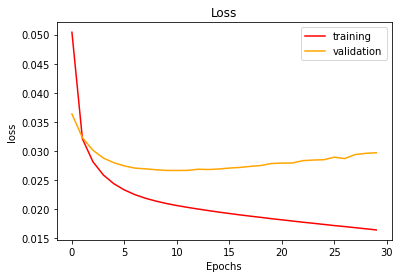

In [26]:
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='orange', label='validation')
plt.legend(loc='best')

In [27]:
tn = history.history['tn']
validation_tn = history.history['val_tn']
prc = history.history['prc']
validation_prc = history.history['val_prc']
acc = history.history['acc']
validation_acc = history.history['val_acc']
roc = history.history['roc']
validation_roc = history.history['val_roc']

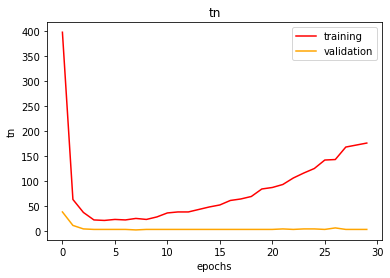

In [28]:
plt.title('tn')
plt.xlabel('epochs')
plt.ylabel('tn')
plt.plot(epochs, tn, c='red', label='training')
plt.plot(epochs, validation_tn, c='orange', label='validation')
plt.legend(loc='best')

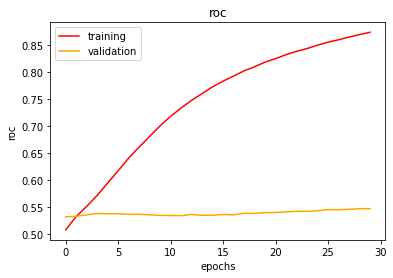

In [29]:
plt.title('roc')
plt.xlabel('epochs')
plt.ylabel('roc')
plt.plot(epochs, roc, c='red', label='training')
plt.plot(epochs, validation_roc, c='orange', label='validation')
plt.legend(loc='best')

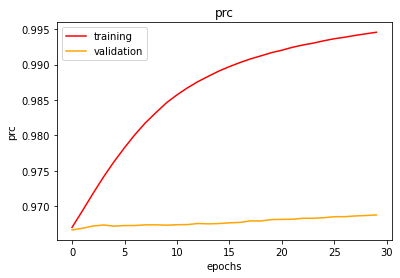

In [30]:
plt.title('prc')
plt.xlabel('epochs')
plt.ylabel('prc')
plt.plot(epochs, prc, c='red', label='training')
plt.plot(epochs, validation_prc, c='orange', label='validation')
plt.legend(loc='best')

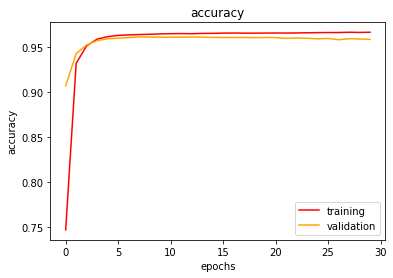

In [31]:
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='orange', label='validation')
plt.legend(loc='best')

In [32]:
modelNoBalance.evaluate(X_train_pca, y_train)

1918/1918 [==============================] - 3s 1ms/step - loss: 0.0188 - tn: 208.0000 - roc: 0.8122 - prc: 0.9897 - acc: 0.9658


[0.018821286037564278,
 208.0,
 0.812198281288147,
 0.9897464513778687,
 0.9658492803573608]

In [20]:
from sklearn import metrics

In [34]:
y_predTrain = modelNoBalance.predict(X_train_pca)

In [35]:
y_predVal = modelNoBalance.predict(X_val_pca)

In [36]:
y_predTrain = (y_predTrain > 0.5)

In [37]:
y_predVal = (y_predVal > 0.5)

In [38]:
metrics.balanced_accuracy_score(y_train, y_predTrain)

0.5472711538032345

In [39]:
metrics.balanced_accuracy_score(y_val, y_predVal)

0.5012132454283597

Izracunavanje predvidjene klase instanci test skupa.

In [86]:
modelNoBalance.evaluate(X_test_pca, y_test)

600/600 [==============================] - 1s 2ms/step - loss: 0.0272 - tn: 2.0000 - roc: 0.5669 - prc: 0.9726 - acc: 0.9586


[0.02724955976009369,
 2.0,
 0.566936194896698,
 0.9725589752197266,
 0.9585505723953247]

In [87]:
y_pred = modelNoBalance.predict(X_test_pca)

In [88]:
y_pred = (y_pred > 0.5)

Većina neutralnih instanci je pogresno klasifikovano.

In [89]:
metrics.confusion_matrix(y_test, y_pred)

array([[    2,   666],
       [  129, 18383]])

In [21]:
import seaborn as sns

[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'cancer')]

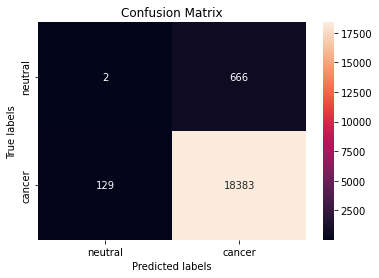

In [91]:
ax = plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['neutral', 'cancer'])
ax.yaxis.set_ticklabels(['neutral', 'cancer'])

In [92]:
metrics.accuracy_score(y_test, y_pred)

0.9585505735140771

In [93]:
metrics.balanced_accuracy_score(y_test, y_pred)

0.49801277954031437

In [94]:
metrics.f1_score(y_test, y_pred)

0.9788344293282926

In [95]:
metrics.precision_score(y_test, y_pred)

0.9650375347787286

In [96]:
metrics.recall_score(y_test, y_pred)

0.9930315471045809

In [97]:
metrics.roc_auc_score(y_test, y_pred)

0.49801277954031437

Formiranje neuronske mreze nad balansiranim podacima.

In [23]:
from imblearn.pipeline import Pipeline

In [99]:
os = imblearn.over_sampling.SMOTE(sampling_strategy=0.1)
us = imblearn.under_sampling.RandomUnderSampler(sampling_strategy=0.1)
pipeline = Pipeline(steps=[('o', os), ('u', us)])
X_train_resampled_comb, y_train_resampled_comb = pipeline.fit_resample(X_train_pca, y_train)

In [620]:
model = Sequential()

In [621]:
model.add(Dense(units=20, input_dim=300, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [622]:
model.compile(optimizers.Adam(learning_rate = 0.0001), loss=tfa.losses.SigmoidFocalCrossEntropy(), metrics=metrike)

In [623]:
history = model.fit(X_train_resampled_comb, y_train_resampled_comb, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
815/815 [==============================] - 5s 4ms/step - loss: 0.0503 - tn: 1191.0000 - roc: 0.6751 - prc: 0.9631 - acc: 0.8678 - val_loss: 0.0251 - val_tn: 0.0000e+00 - val_roc: 0.0000e+00 - val_prc: 1.0000 - val_acc: 0.9423
Epoch 2/30
815/815 [==============================] - 2s 3ms/step - loss: 0.0458 - tn: 190.0000 - roc: 0.6272 - prc: 0.9272 - acc: 0.8599 - val_loss: 0.0230 - val_tn: 0.0000e+00 - val_roc: 0.0000e+00 - val_prc: 1.0000 - val_acc: 0.9758
Epoch 3/30
815/815 [==============================] - 2s 3ms/step - loss: 0.0441 - tn: 122.0000 - roc: 0.6611 - prc: 0.9358 - acc: 0.8744 - val_loss: 0.0222 - val_tn: 0.0000e+00 - val_roc: 0.0000e+00 - val_prc: 1.0000 - val_acc: 0.9851
Epoch 4/30
815/815 [==============================] - 2s 3ms/step - loss: 0.0429 - tn: 133.0000 - roc: 0.6902 - prc: 0.9428 - acc: 0.8795 - val_loss: 0.0214 - val_tn: 0.0000e+00 - val_roc: 0.0000e+00 - val_prc: 1.0000 - val_acc: 0.9897
Epoch 5/30
815/815 [==============================] - 2

Prkaz mera kvaliteta modela na trening i na validacionom skupu (loss, true negative, roc, precision-recall curve, accuracy). 

In [624]:
epochs = history.epoch

In [625]:
loss = history.history['loss']
validation_loss = history.history['val_loss']

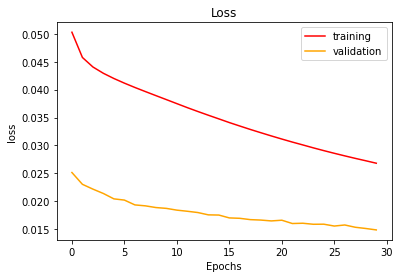

In [626]:
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='orange', label='validation')
plt.legend(loc='best')

In [627]:
tn = history.history['tn']
validation_tn = history.history['val_tn']
prc = history.history['prc']
validation_prc = history.history['val_prc']
roc = history.history['roc']
validation_roc = history.history['val_roc']
acc = history.history['acc']
validation_acc = history.history['val_acc']

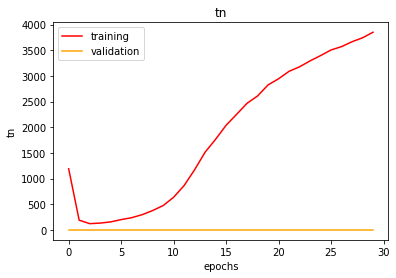

In [628]:
plt.title('tn')
plt.xlabel('epochs')
plt.ylabel('tn')
plt.plot(epochs, tn, c='red', label='training')
plt.plot(epochs, validation_tn, c='orange', label='validation')
plt.legend(loc='best')

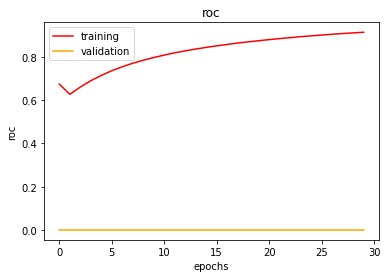

In [629]:
plt.title('roc')
plt.xlabel('epochs')
plt.ylabel('roc')
plt.plot(epochs, roc, c='red', label='training')
plt.plot(epochs, validation_roc, c='orange', label='validation')
plt.legend(loc='best')

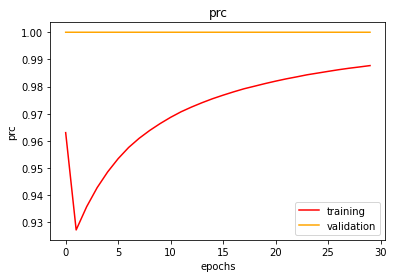

In [630]:
plt.title('prc')
plt.xlabel('epochs')
plt.ylabel('prc')
plt.plot(epochs, prc, c='red', label='training')
plt.plot(epochs, validation_prc, c='orange', label='validation')
plt.legend(loc='best')

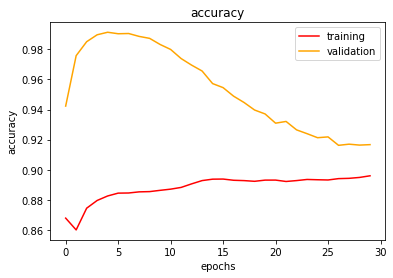

In [631]:
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='orange', label='validation')
plt.legend(loc='best')

In [632]:
model.evaluate(X_train_pca, y_train)

1918/1918 [==============================] - 3s 2ms/step - loss: 0.0190 - tn: 1031.0000 - roc: 0.8690 - prc: 0.9944 - acc: 0.9120


[0.018980789929628372,
 1031.0,
 0.8689944744110107,
 0.9943875074386597,
 0.9119837284088135]

In [633]:
y_predTrain = model.predict(X_train_pca)

In [634]:
y_predVal = model.predict(X_val_pca)

In [635]:
y_predVal = (y_predVal > 0.5)

In [636]:
y_predTrain = (y_predTrain > 0.5)

In [637]:
metrics.balanced_accuracy_score(y_train, y_predTrain)

0.7050706145732393

In [638]:
metrics.balanced_accuracy_score(y_val, y_predVal)

0.5162721564283673

Izracunavanje predvidjene klase instanci test skupa.

In [639]:
model.evaluate(X_test_pca, y_test)

600/600 [==============================] - 1s 2ms/step - loss: 0.0360 - tn: 94.0000 - roc: 0.5775 - prc: 0.9733 - acc: 0.8861


[0.03597377985715866,
 94.0,
 0.5774698853492737,
 0.9733325839042664,
 0.8860792517662048]

In [640]:
y_pred = model.predict(X_test_pca)

In [641]:
y_pred = (y_pred > 0.5)

Vecina neutralnih instanci je pogresno klasifikovana.

In [642]:
metrics.confusion_matrix(y_test, y_pred)

array([[   94,   574],
       [ 1611, 16901]])

[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'cancer')]

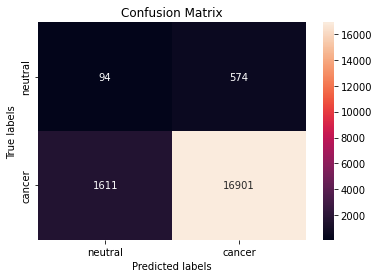

In [643]:
ax = plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['neutral', 'cancer'])
ax.yaxis.set_ticklabels(['neutral', 'cancer'])

In [644]:
metrics.accuracy_score(y_test, y_pred)

0.8860792492179353

In [645]:
metrics.balanced_accuracy_score(y_test, y_pred)

0.5268469651017758

In [646]:
metrics.f1_score(y_test, y_pred)

0.9392836301997943

In [647]:
metrics.recall_score(y_test, y_pred)

0.9129753673293

In [648]:
metrics.roc_auc_score(y_test, y_pred)

0.5268469651017758

Formiranje model sa podesavanjem parametra sample_weight (tezina instanci).

In [24]:
modelBatchBalanced = Sequential()
modelBatchBalanced.add(Dense(units=20, input_dim=300, activation='relu'))
modelBatchBalanced.add(Dense(units=10, activation='relu'))
modelBatchBalanced.add(Dense(units=1, activation='sigmoid'))

In [25]:
modelBatchBalanced.compile(optimizers.Adam(learning_rate = 0.0001), loss=tfa.losses.SigmoidFocalCrossEntropy()
, metrics=metrike)

In [26]:
from sklearn.utils import class_weight
sample = class_weight.compute_sample_weight('balanced', y_train)

In [27]:
sample

array([0.51802866, 0.51802866, 0.51802866, ..., 0.51802866, 0.51802866,
       0.51802866])

In [28]:
history = modelBatchBalanced.fit(X_train_pca, y_train, epochs=30, batch_size=64, validation_split=0.2, sample_weight=sample)

Epoch 1/30
768/768 [==============================] - 6s 6ms/step - loss: 0.0876 - tn: 1427.0000 - roc: 0.4862 - prc: 0.9651 - acc: 0.1718 - val_loss: 0.0866 - val_tn: 398.0000 - val_roc: 0.5011 - val_prc: 0.9637 - val_acc: 0.1620
Epoch 2/30
768/768 [==============================] - 2s 3ms/step - loss: 0.0798 - tn: 1556.0000 - roc: 0.5165 - prc: 0.9689 - acc: 0.1298 - val_loss: 0.0837 - val_tn: 413.0000 - val_roc: 0.5024 - val_prc: 0.9635 - val_acc: 0.1312
Epoch 3/30
768/768 [==============================] - 2s 2ms/step - loss: 0.0759 - tn: 1614.0000 - roc: 0.5444 - prc: 0.9718 - acc: 0.1096 - val_loss: 0.0818 - val_tn: 421.0000 - val_roc: 0.5062 - val_prc: 0.9636 - val_acc: 0.1035
Epoch 4/30
768/768 [==============================] - 2s 2ms/step - loss: 0.0733 - tn: 1651.0000 - roc: 0.5716 - prc: 0.9747 - acc: 0.0946 - val_loss: 0.0808 - val_tn: 424.0000 - val_roc: 0.5114 - val_prc: 0.9641 - val_acc: 0.1014
Epoch 5/30
768/768 [==============================] - 2s 2ms/step - loss: 0.

Prkaz mera kvaliteta modela na trening i na validacionom skupu (loss, true negative, roc, precision-recall curve, accuracy). 

In [29]:
epochs = history.epoch

In [30]:
loss = history.history['loss']
validation_loss = history.history['val_loss']

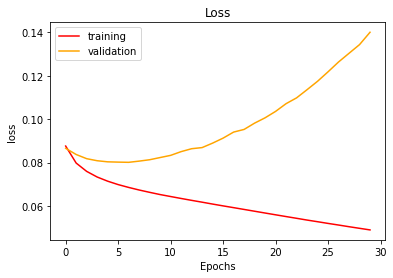

In [31]:
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='orange', label='validation')
plt.legend(loc='best')

In [32]:
tn = history.history['tn']
validation_tn = history.history['val_tn']
prc = history.history['prc']
validation_prc = history.history['val_prc']
roc = history.history['roc']
validation_roc = history.history['val_roc']
acc = history.history['acc']
validation_acc = history.history['val_acc']

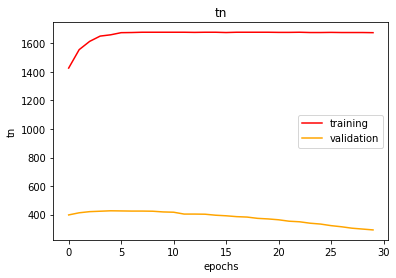

In [33]:
plt.title('tn')
plt.xlabel('epochs')
plt.ylabel('tn')
plt.plot(epochs, tn, c='red', label='training')
plt.plot(epochs, validation_tn, c='orange', label='validation')
plt.legend(loc='best')

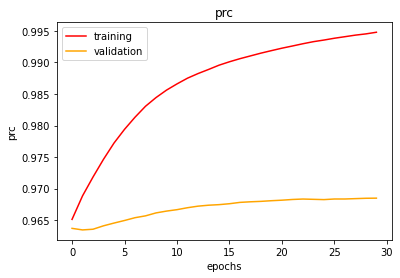

In [34]:
plt.title('prc')
plt.xlabel('epochs')
plt.ylabel('prc')
plt.plot(epochs, prc, c='red', label='training')
plt.plot(epochs, validation_prc, c='orange', label='validation')
plt.legend(loc='best')

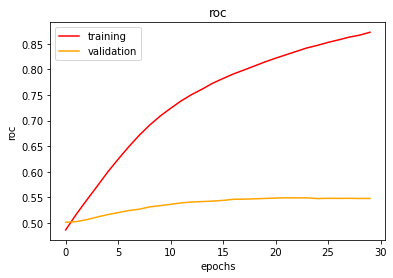

In [35]:
plt.title('roc')
plt.xlabel('epochs')
plt.ylabel('roc')
plt.plot(epochs, roc, c='red', label='training')
plt.plot(epochs, validation_roc, c='orange', label='validation')
plt.legend(loc='best')

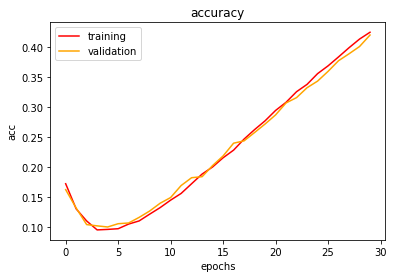

In [36]:
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='orange', label='validation')
plt.legend(loc='best')

In [37]:
modelBatchBalanced.evaluate(X_train_pca, y_train)

1918/1918 [==============================] - 4s 2ms/step - loss: 0.0573 - tn: 1971.0000 - roc: 0.8114 - prc: 0.9898 - acc: 0.4314


[0.057314880192279816,
 1971.0,
 0.8114209175109863,
 0.9897803068161011,
 0.4314134418964386]

In [38]:
y_predBatchTrain = modelBatchBalanced.predict(X_train_pca)

In [39]:
y_predBatchVal = modelBatchBalanced.predict(X_val_pca)

In [40]:
y_predBatchTrain = (y_predBatchTrain > 0.5)

In [41]:
y_predBatchVal = (y_predBatchVal > 0.5)

In [42]:
metrics.balanced_accuracy_score(y_train, y_predBatchTrain)

0.6682249333351794

In [43]:
metrics.balanced_accuracy_score(y_val, y_predBatchVal)

0.5377290877962304

Izracunavanje predvidjene klase instanci test skupa.

In [44]:
modelBatchBalanced.evaluate(X_test_pca, y_test)

600/600 [==============================] - 1s 2ms/step - loss: 0.0622 - tn: 454.0000 - roc: 0.5701 - prc: 0.9730 - acc: 0.4178


[0.06217092275619507,
 454.0,
 0.5700518488883972,
 0.9730011224746704,
 0.41783106327056885]

In [45]:
y_predBatch = modelBatchBalanced.predict(X_test_pca)

In [46]:
y_predBatch = (y_predBatch > 0.5)

Vecina stetnih instanci je pogresno klasifikovana.

In [47]:
metrics.confusion_matrix(y_test, y_predBatch)

array([[  454,   214],
       [10952,  7560]])

[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'cancer')]

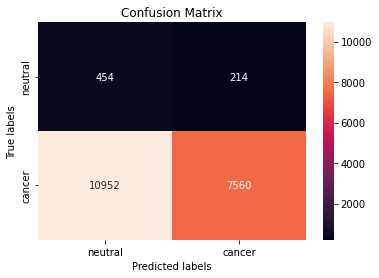

In [48]:
ax = plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_test, y_predBatch), annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['neutral', 'cancer'])
ax.yaxis.set_ticklabels(['neutral', 'cancer'])

In [49]:
metrics.balanced_accuracy_score(y_test, y_predBatch)

0.5440122348216272

In [50]:
metrics.accuracy_score(y_test, y_predBatch)

0.4178310740354536

In [51]:
metrics.f1_score(y_test, y_predBatch)

0.5752111390093586

In [52]:
metrics.recall_score(y_test, y_predBatch)

0.4083837510803803

In [53]:
metrics.roc_auc_score(y_test, y_predBatch)

0.5440122348216273

Formiranje modela sa podesavanjem parametra class_weight (težine klasa).

In [54]:
modelBatchBalancedClass = Sequential()
modelBatchBalancedClass.add(Dense(units=20, input_dim=300, activation='relu'))
modelBatchBalancedClass.add(Dense(units=10, activation='relu'))
modelBatchBalancedClass.add(Dense(units=1, activation='sigmoid'))

In [55]:
modelBatchBalancedClass.compile(optimizers.Adam(learning_rate = 0.0001), loss=tfa.losses.SigmoidFocalCrossEntropy(), metrics=metrike)

In [56]:
from sklearn.utils import class_weight
classWeight = class_weight.compute_class_weight('balanced', np.unique(y_train),y_train)

/home/sandra/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass classes=[0. 1.], y=53119    1.0
47269    1.0
83905    1.0
62887    1.0
15433    1.0
        ... 
93125    1.0
24115    1.0
29617    1.0
8774     1.0
32516    1.0
Name: Class, Length: 61375, dtype: float64 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [57]:
d_class_weights = dict(enumerate(classWeight))

In [58]:
classWeight

array([14.36680712,  0.51802866])

In [59]:
history = modelBatchBalancedClass.fit(X_train_pca, y_train, epochs=30, batch_size=64, validation_split=0.2, class_weight=d_class_weights)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/30
768/768 [==============================] - 4s 3ms/step - loss: 0.3756 - tn: 552.0000 - roc: 0.5374 - prc: 0.9698 - acc: 0.7759 - val_loss: 0.0400 - val_tn: 80.0000 - val_roc: 0.5279 - val_prc: 0.9659 - val_acc: 0.8255
Epoch 2/30
768/768 [==============================] - 2s 3ms/step - loss: 0.1689 - tn: 561.0000 - roc: 0.5431 - prc: 0.9712 - acc: 0.6937 - val_loss: 0.0488 - val_tn: 222.0000 - val_roc: 0.5341 - val_prc: 0.9663 - val_acc: 0.5579
Epoch 3/30
768/768 [==============================] - 2s 2ms/step - loss: 0.1076 - tn: 1055.0000 - roc: 0.5468 - prc: 0.9719 - acc: 0.4421 - val_loss: 0.0618 - val_tn: 323.0000 - val_roc: 0.5346 - val_prc: 0.9666 - val_acc: 0.3575
Epoch 4/30
768/768 [==============================] - 2s 3ms/step - loss: 0.0883 - tn: 1339.0000 - roc: 0.5506 - prc: 0.9726 - acc: 0.3010 - val_loss: 0.0711 - val_tn: 372.

Prkaz mera kvaliteta modela na trening i na validacionom skupu (loss, true negative, roc, precision-recall curve, accuracy). 

In [60]:
epochs = history.epoch

In [61]:
loss = history.history['loss']
validation_loss = history.history['val_loss']

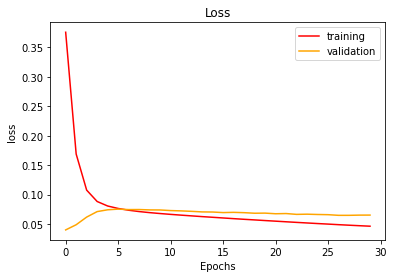

In [62]:
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='orange', label='validation')
plt.legend(loc='best')

In [63]:
tn = history.history['tn']
validation_tn = history.history['val_tn']
prc = history.history['prc']
validation_prc = history.history['val_prc']
roc = history.history['roc']
validation_roc = history.history['val_roc']
acc = history.history['acc']
validation_acc = history.history['val_acc']

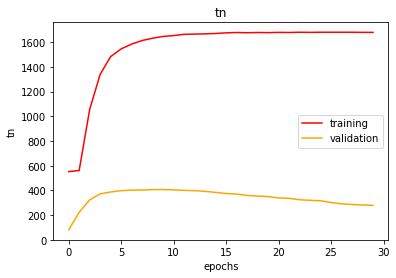

In [64]:
plt.title('tn')
plt.xlabel('epochs')
plt.ylabel('tn')
plt.plot(epochs, tn, c='red', label='training')
plt.plot(epochs, validation_tn, c='orange', label='validation')
plt.legend(loc='best')

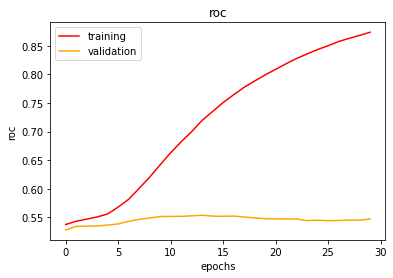

In [65]:
plt.title('roc')
plt.xlabel('epochs')
plt.ylabel('roc')
plt.plot(epochs, roc, c='red', label='training')
plt.plot(epochs, validation_roc, c='orange', label='validation')
plt.legend(loc='best')

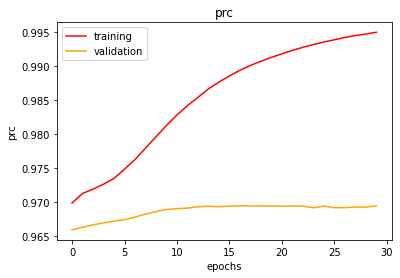

In [66]:
plt.title('prc')
plt.xlabel('epochs')
plt.ylabel('prc')
plt.plot(epochs, prc, c='red', label='training')
plt.plot(epochs, validation_prc, c='orange', label='validation')
plt.legend(loc='best')

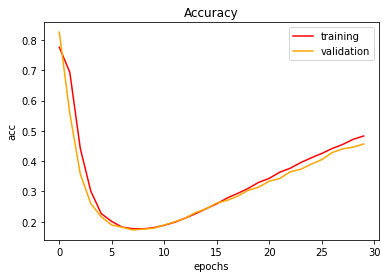

In [67]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='orange', label='validation')
plt.legend(loc='best')

In [68]:
modelBatchBalancedClass.evaluate(X_train_pca, y_train)

1918/1918 [==============================] - 3s 2ms/step - loss: 0.0561 - tn: 1960.0000 - roc: 0.8146 - prc: 0.9902 - acc: 0.4754


[0.056139957159757614,
 1960.0,
 0.8145613074302673,
 0.9902358651161194,
 0.47543787956237793]

In [69]:
y_predBatchClassTrain = modelBatchBalancedClass.predict(X_train_pca)

In [70]:
y_predBatchClassVal = modelBatchBalancedClass.predict(X_val_pca)

In [71]:
y_predBatchClassVal = (y_predBatchClassVal > 0.5)

In [72]:
y_predBatchClassTrain = (y_predBatchClassTrain > 0.5)

In [73]:
metrics.balanced_accuracy_score(y_train, y_predBatchClassTrain)

0.6885487929837699

In [74]:
metrics.balanced_accuracy_score(y_val, y_predBatchClassVal)

0.530447086314288

Izracunavanje predvidjene klase instanci test skupa.

In [75]:
modelBatchBalancedClass.evaluate(X_test_pca, y_test)

600/600 [==============================] - 1s 2ms/step - loss: 0.0654 - tn: 426.0000 - roc: 0.5595 - prc: 0.9723 - acc: 0.4518


[0.06538176536560059,
 426.0,
 0.5594531893730164,
 0.9722566604614258,
 0.45177268981933594]

In [76]:
y_predBatchClass = modelBatchBalancedClass.predict(X_test_pca)

In [77]:
y_predBatchClass = (y_predBatchClass > 0.5)

In [78]:
metrics.accuracy_score(y_test, y_predBatchClass)

0.45177267987486963

In [79]:
metrics.balanced_accuracy_score(y_test, y_predBatchClass)

0.5413936064776238

In [80]:
metrics.recall_score(y_test, y_predBatchClass)

0.4450626620570441

In [81]:
metrics.precision_score(y_test, y_predBatchClass)

0.9714656290531777

In [82]:
metrics.roc_auc_score(y_test, y_predBatchClass)

0.5413936064776238

In [83]:
metrics.f1_score(y_test, y_predBatchClass)

0.610454562293928

Vecina stetnih instanci je pogresno klasifikovana.

In [395]:
metrics.confusion_matrix(y_test, y_predBatchClass)

array([[  456,   212],
       [11057,  7455]])

[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'cancer')]

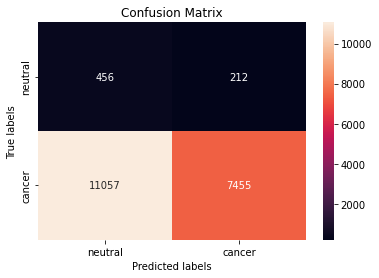

In [396]:
ax = plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_test, y_predBatchClass), annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['neutral', 'cancer'])
ax.yaxis.set_ticklabels(['neutral', 'cancer'])

Formiranje modela sa prosleđivanjem genetarora koji slučajnim izborom bira podskup instanci iz trening skupa tako da udeo jedne i druge klase u podskupu bude isti.

In [11]:
modelBatchGenerated = Sequential()
modelBatchGenerated.add(Dense(units=20, input_dim=300, activation='relu'))
modelBatchGenerated.add(Dense(units=10, activation='relu'))
modelBatchGenerated.add(Dense(units=1, activation='sigmoid'))

In [21]:
modelBatchGenerated.compile(optimizers.Adam(learning_rate = 0.0001), loss=tfa.losses.SigmoidFocalCrossEntropy(), metrics=metrike)

In [24]:
from keras_balanced_batch_generator import make_generator

In [25]:
from tensorflow.keras.utils import to_categorical

In [24]:
y_train2 = to_categorical(y_train)

In [25]:
generator = make_generator(X_train_pca, y_train2, 2000, categorical=False)

In [252]:
historyGen = modelBatchGenerated.fit_generator(generator, epochs=30, steps_per_epoch=10, validation_data=(X_val_pca, y_val))

Epoch 1/30
10/10 [==============================] - 3s 199ms/step - loss: 0.1986 - tn: 3528.0000 - roc: 0.3622 - prc: 0.6210 - acc: 0.3950 - val_loss: 0.0679 - val_tn: 165.0000 - val_roc: 0.4932 - val_prc: 0.9647 - val_acc: 0.6761
Epoch 2/30
10/10 [==============================] - 1s 88ms/step - loss: 0.1908 - tn: 3288.0000 - roc: 0.5048 - prc: 0.5043 - acc: 0.4952 - val_loss: 0.0702 - val_tn: 182.0000 - val_roc: 0.4926 - val_prc: 0.9647 - val_acc: 0.6580
Epoch 3/30
10/10 [==============================] - 1s 91ms/step - loss: 0.1798 - tn: 3512.0000 - roc: 0.5072 - prc: 0.5095 - acc: 0.4999 - val_loss: 0.0725 - val_tn: 195.0000 - val_roc: 0.4916 - val_prc: 0.9646 - val_acc: 0.6368
Epoch 4/30
10/10 [==============================] - 1s 81ms/step - loss: 0.1693 - tn: 3742.0000 - roc: 0.5120 - prc: 0.5099 - acc: 0.5060 - val_loss: 0.0748 - val_tn: 206.0000 - val_roc: 0.4909 - val_prc: 0.9646 - val_acc: 0.6158
Epoch 5/30
10/10 [==============================] - 1s 83ms/step - loss: 0.1605

Prkaz mera kvaliteta modela na trening i na validacionom skupu (loss, true negative, roc, precision-recall curve, accuracy). 

In [253]:
epochs = historyGen.epoch

In [254]:
loss = historyGen.history['loss']
validation_loss = historyGen.history['val_loss']

In [255]:
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='orange', label='validation')
plt.legend(loc='best')

In [256]:
tn = historyGen.history['tn']
validation_tn = historyGen.history['val_tn']
prc = historyGen.history['prc']
validation_prc = historyGen.history['val_prc']
roc = historyGen.history['roc']
validation_roc = historyGen.history['val_roc']
acc = historyGen.history['acc']
validation_acc = historyGen.history['val_acc']

In [257]:
plt.title('tn')
plt.xlabel('epochs')
plt.ylabel('tn')
plt.plot(epochs, tn, c='red', label='training')
plt.plot(epochs, validation_tn, c='orange', label='validation')
plt.legend(loc='best')

In [258]:
plt.title('prc')
plt.xlabel('epochs')
plt.ylabel('prc')
plt.plot(epochs, prc, c='red', label='training')
plt.plot(epochs, validation_prc, c='orange', label='validation')
plt.legend(loc='best')

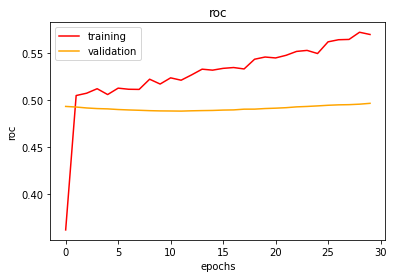

In [259]:
plt.title('roc')
plt.xlabel('epochs')
plt.ylabel('roc')
plt.plot(epochs, roc, c='red', label='training')
plt.plot(epochs, validation_roc, c='orange', label='validation')
plt.legend(loc='best')

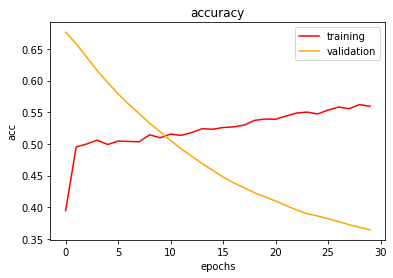

In [260]:
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='orange', label='validation')
plt.legend(loc='best')

In [261]:
y_train = y_train.astype(np.float)

In [262]:
modelBatchGenerated.evaluate(X_train_pca, y_train)

1918/1918 [==============================] - 3s 2ms/step - loss: 0.0809 - tn: 1656.0000 - roc: 0.5710 - prc: 0.9751 - acc: 0.3648


[0.08087918907403946,
 1656.0,
 0.5709731578826904,
 0.975051760673523,
 0.3647902309894562]

In [263]:
y_predGenTrain = modelBatchGenerated.predict(X_train_pca)

In [264]:
y_predGenVal = modelBatchGenerated.predict(X_val_pca)

In [265]:
y_predGenTrain = (y_predGenTrain > 0.5)

In [266]:
y_predGenVal = (y_predGenVal > 0.5)

In [268]:
metrics.balanced_accuracy_score(y_train, y_predGenTrain)

0.5626349631875903

In [269]:
metrics.balanced_accuracy_score(y_val, y_predGenVal)

0.49566468652873985

Izracunavanje predvidjene klase instanci test skupa.

In [270]:
modelBatchGenerated.evaluate(X_test_pca, y_test)

600/600 [==============================] - 1s 2ms/step - loss: 0.0817 - tn: 480.0000 - roc: 0.5208 - prc: 0.9693 - acc: 0.3569


[0.08173013478517532,
 480.0,
 0.5208209753036499,
 0.969330370426178,
 0.3569343090057373]

In [272]:
y_predGen = modelBatchGenerated.predict(X_test_pca)

In [273]:
y_predGen = (y_predGen > 0.5)

Vecina stetnih instanci je pogresno klasifikovano.

In [274]:
metrics.confusion_matrix(y_test, y_predGen)

array([[  480,   188],
       [12146,  6366]])

[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'cancer')]

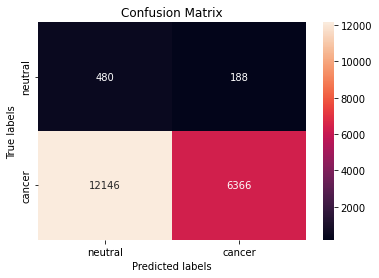

In [275]:
ax = plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_test, y_predGen), annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['neutral', 'cancer'])
ax.yaxis.set_ticklabels(['neutral', 'cancer'])

In [277]:
metrics.accuracy_score(y_test, y_predGen)

0.35693430656934305

In [278]:
metrics.balanced_accuracy_score(y_test, y_predGen)

0.5312239608941149

In [280]:
metrics.recall_score(y_test, y_predGen)

0.34388504753673294

In [281]:
metrics.precision_score(y_test, y_predGen)

0.9713152273420812

In [282]:
metrics.roc_auc_score(y_test, y_predGen)

0.5312239608941149

In [283]:
metrics.f1_score(y_test, y_predGen)

0.5079390409319396

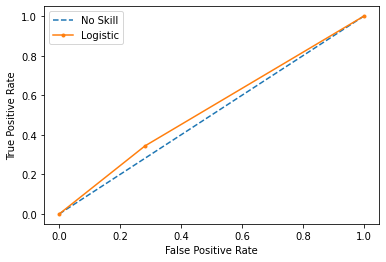

In [284]:
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
fpr, tpr, _ = metrics.roc_curve(y_test, y_predGen)
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Proces formiranja finalnog skup modela sa svim izabranim parametrima i podacima iz baze.

In [31]:
y_final = database['Class']
X_final = database.drop(columns=['Class', 'variation', 'Gene name'])

In [32]:
scaler = StandardScaler()
scaler.fit(X_final)
X_final = scaler.transform(X_final)

In [33]:
pca = PCA(n_components=300)

In [34]:
pca.fit(X_final, y_final)

PCA(n_components=300)

In [35]:
X_final_pca = pca.transform(X_final)

In [31]:
from pickle import dump

Čuvanje parametara za skaliranje i primenu PCA algoritma, ovi parametri važe za sve podele.

In [32]:
dump(scaler, open('scaler.pkl', 'wb'))

In [33]:
dump(pca, open('pca.pkl', 'wb'))

In [43]:
modelBatchGeneratedF = Sequential()
modelBatchGeneratedF.add(Dense(units=20, input_dim=300, activation='relu'))
modelBatchGeneratedF.add(Dense(units=10, activation='relu'))
modelBatchGeneratedF.add(Dense(units=1, activation='sigmoid'))

modelBatchGeneratedF.compile(optimizers.Adam(learning_rate = 0.0001), loss=tfa.losses.SigmoidFocalCrossEntropy())
y_final2 = to_categorical(y_final)
generatorF = make_generator(X_final_pca, y_final2, 2000, categorical=False)
historyGenF = modelBatchGeneratedF.fit_generator(generatorF, epochs=30, steps_per_epoch=10)

modelBatchGeneratedF.save('NeuralNetworkModel/model')

/home/sandra/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
10/10 [==============================] - 1s 16ms/step - loss: 0.1213
Epoch 2/30
10/10 [==============================] - 0s 16ms/step - loss: 0.1161
Epoch 3/30
10/10 [==============================] - 0s 18ms/step - loss: 0.1153
Epoch 4/30
10/10 [==============================] - 0s 18ms/step - loss: 0.1140
Epoch 5/30
10/10 [==============================] - 0s 15ms/step - loss: 0.1105
Epoch 6/30
10/10 [==============================] - 0s 15ms/step - loss: 0.1093
Epoch 7/30
10/10 [==============================] - 0s 16ms/step - loss: 0.1050
Epoch 8/30
10/10 [==============================] - 0s 18ms/step - loss: 0.1038
Epoch 9/30
10/10 [==============================] - 0s 15ms/step - loss: 0.1034
Epoch 10/30
10/10 [==============================] - 0s 24ms/step - loss: 0.1030
Epoch 11/30
10/10 [==============================] - 0s 14ms/step - loss: 0.1006
Epoch 12/30
10/10 [==============================] - 0s 14ms/step - loss: 0.0997
Epoch 13/30
10/10 [==================